# Introduction

In this project we seek to construct a simple model of the inate immune response of humans. The evolution af antigens and white blood cells are evaluated through Monte Carlo simulations. 

# Theory
## Immuniology 
The first line of defense of the human immune system is the innate immune response. This can be divided into three different phases. Initially, when a pathogen enters the body, the macrophages, which are a type of white blood cell flowing around in the bloodstream, encounter the intruder and eats it. They then retain a part of the pathogen and bring it to another type of white blood cell, the T-cells. The T-cells then gather to fight the attackers. They flow out into the bloodstream and kill all elements that present the antigen introduced by the macrophages. Some T-cells travel to the lymph nodes and provide the B-cells with information on the new intruders. The B-cells start producing antibodies and release them into the bloodstream, where they attach to the antigen, serving as a marker for all remaining types of white blood cells, which then start contributing in fending off the attack. (This podcast will kill you, Episode 26) 

## The model
We seek to create a simple model of an infection and the immune response. We introduce a generic white blood cell which serves the purpose of both the macrofagues and the T-cells

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import numba
import time
import os
from datetime import datetime

In [41]:

# the body is modelled by an N by N lattice
size = 10
lattice = np.zeros([size,size])

T_num_in = 3
B_num_in = 10

# interaction matrix
BB_int = 1
TT_int = 2
BT_int = 4
eps = ([0,      0,      0], 
       [0, BB_int, BT_int],
       [0, BT_int, TT_int])

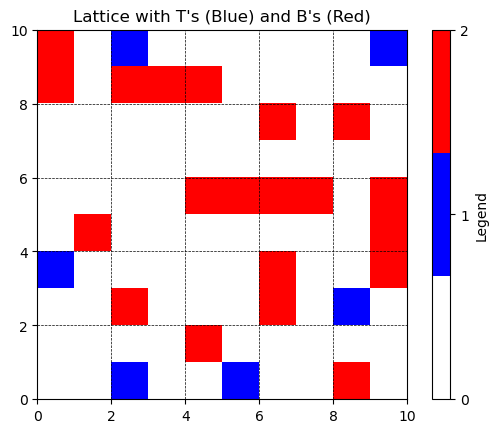

In [43]:
# Place T cells and bacteria

# Place T's randomly
t_coords = set()
while len(t_coords) < T_num_in:
    t = (np.random.randint(size), np.random.randint(size))
    if t not in t_coords:
        t_coords.add(t)
        lattice[t[0], t[1]] = 1

# Place B's randomly
b_coords = set()
while len(b_coords) < B_num_in:
    b = (np.random.randint(size), np.random.randint(size))
    if b not in b_coords and b not in t_coords:
        b_coords.add(b)
        lattice[b[0], b[1]] = 2

# Create a colormap for red (B) and blue (T)
cmap = plt.cm.colors.ListedColormap(['white', 'blue', 'red'])

# Plot the lattice
plt.imshow(lattice, cmap=cmap, extent=[0, size, 0, size])
plt.colorbar(ticks=[0, 1, 2], label="Legend")
plt.title("Lattice with T's (Blue) and B's (Red)")

#plt.grid(True, linewidth=0.5, color='black')

plt.show()

In [26]:
# showing lattices as they evolve 

def lattice_plots(lattice_history, selected_indices):

    cmap = plt.get_cmap("binary", 2)

    for i in range(len(selected_indices)):

        # Create a plot
        plt.matshow(lattice_history[i], cmap=cmap)
       # plt.xticks(range(lattice.shape[1]))
        #plt.yticks(range(lattice.shape[0]))

        plt.grid(visible=False)

        plt.title(f"Lattice at Iteration {selected_indices[i]}")  # Add a title with the iteration number

        fig_name = f"Plot\Lattice_iter{selected_indices[i]}"
       # plt.savefig(fig_name)
        plt.show()

In [ ]:
# the interaction matrix can be used to decide how many bacteria are able to multiply. 
# if surrounded by T cells -> no division